In [1]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [3]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    # featVec = feature vector 特征向量
    for featVec in dataSet:
        # 创建数据字典，其键值为最后一列的数值
        currentLabel = featVec[-1]
        # 如果当前键值不存在，则扩展字典并将当前键值加入字典
        if(currentLabel not in labelCounts.keys()):
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    # 初始化香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 用频率代替概率
        prob = float(labelCounts[key]) / numEntries
        # entropy = -(求和)p*log(p)
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

In [4]:
myDat, labels = createDataSet()
print(myDat)
print(labels)
calcShannonEnt(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']


0.9709505944546686

In [5]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    # 遍历数据集的所有特征向量
    for featVec in dataSet:
        # 如果发现第axis轴上的特征符合要求的值
        if featVec[axis] == value:
            # 划分出符合该特征值的数据集的子集ret，
            # 将子集中的该特征的轴去掉，并返回该子集
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis + 1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [6]:
myDat, labels = createDataSet()
print(myDat)
print(splitDataSet(myDat, 0, 1))
print(splitDataSet(myDat, 0, 0))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [7]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    # 原始数据集的熵
    baseEntropy = calcShannonEnt(dataSet)
    # 初始化最大信息增益
    bestInfoGain = 0.0
    # 初始化最佳划分特征
    bestFeature = -1
    # 遍历所有特征
    for i in range(numFeatures):
        # 将数据集中所有特征向量的第i个特征值的存入featList
        featList = [example[i] for example in dataSet]
#         print(featList)
        # 将第i个特征的所有可能取值存入uniqueVals
        uniqueVals = set(featList)
#         print(uniqueVals)
        # 对每个特征计算前都初始化新的熵
        newEntropy = 0.0
        # 遍历所有可能的第i个特征的值
        for value in uniqueVals:
            # 按第i个特征划分数据集
            subDataSet = splitDataSet(dataSet, i, value)
            # prob = 不同子集出现的概率
            prob = len(subDataSet) / float(len(dataSet))
            # 该公式为统计学习方法中的 H(D|A)
            newEntropy += prob * calcShannonEnt(subDataSet)
        # 计算按第i个特征划分的信息增益
        infoGain = baseEntropy - newEntropy
#         print(infoGain)
        # 如果按当前第i个特征划分得到的信息增益
        # 大于之前划分所得到的最大信息增益
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    # 返回最佳特征所在轴的索引
    return bestFeature

In [8]:
chooseBestFeatureToSplit(myDat)

0

In [9]:
import operator
def majorityCnt(classList):
    '''
    类标签的列表
    返回次数最多的类标签的名称
    '''
    classCount = {}
    for vote in classList:
        if(vote not in classCount.keys()):
            classCount[vote] = 0
        classCount[vote] += 1
    # python3 中 dict的iteritems用items代替了
    # sortedClassCount是一个含 ('类标签名称'，出现次数)的列表
    sortedClassCount = sorted(classCount.items(),
                                  key=operator.itemgetter(1),
                                  reverse=True)
#     print(sortedClassCount)
    # 返回出现次数最多的类标签的名称
    return sortedClassCount[0][0]

In [10]:
def createTree(dataSet, labels):
    '''
    递归创建决策树。
    首先按给定的数据集D和特征标签列表L，选出信息增益最大的特征A，
    按A的可能的值A1和A2划分数据集得到D1，D2和剩余特征列表L_left
    createTree(D,L)={'最佳特征A':{'A1':createTree(D1,L_left),
                                  'A2':createTree(D2,L_left)}}
    直到某个的数据集Di里都是同一类别的实例
    或者数据集Di的实例向量长度为1,即用完了所有特征,只剩类别标签
    最终返回决策树
    '''
    classList = [example[-1] for example in dataSet]
    # 如果标签列表里第一个标签的总数就等于列表长度
    # 即列表里都是同一个标签,则直接返回该标签
    if(classList.count(classList[0]) == len(classList)):
        return classList[0]
    if(len(dataSet[0]) == 1):
        return majorityCnt(classList)
    # 得到最佳特征所在轴的索引
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 通过最佳特征的索引得到名称
    bestFeatLabel = labels[bestFeat]
    # 一层一层往下分类
    # 在最佳特征内嵌套字典，按最佳特征的值添加键，按其值划分的数据集为值
    myTree = {bestFeatLabel:{}}
    # 从特征列表中删除已经用过的特征名称
    del(labels[bestFeat])
    # 得到每个实例的最佳特征的值
    featValues = [example[bestFeat] for example in dataSet]
    # 最佳特征所有可能的值
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        # 按最佳特征的值划分数据集，并递归创建子树
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,
                                                bestFeat, value),subLabels)
    return myTree

In [20]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [21]:
def classify(inputTree, featLabels, testVec):
    # firstStr为树的第一个键，即根节点，也即第一个用来划分的特征
    firstStr = list(inputTree.keys())[0]
    print("firstStr：",firstStr)
    # 第一个键对应的值(字典)
    secondDict = inputTree[firstStr]
    print("secondDict：", secondDict)
    # 第一个键特征在特征标签列表中的索引
    featIndex = featLabels.index(firstStr)
    print("featIndex：", featIndex)
    # key是相应特征对应测试实例中的的取值，也即是父子节点间的判断
    key = testVec[featIndex]
    print("key:", key)
    # 该取值对应的子树(字典)或类别标签
    valueOfFeat = secondDict[key]
    print("valueOfFeat:",valueOfFeat)
    # 当valueofFeat不再是字典类型时，退出迭代，此时已经得到分类结果
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
        print("classLabel:",classLabel)
    else:
        classLabel = valueOfFeat
        print("classLabel:", classLabel)
    return classLabel

In [22]:
myDat, labels = createDataSet()
classify(myTree, labels, [1,0])

firstStr： no surfacing
secondDict： {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}
featIndex： 0
key: 1
valueOfFeat: {'flippers': {0: 'no', 1: 'yes'}}
firstStr： flippers
secondDict： {0: 'no', 1: 'yes'}
featIndex： 1
key: 0
valueOfFeat: no
classLabel: no
classLabel: no


'no'

In [16]:
# 使用pickle存储决策树,读写过程中一定要采用二进制读写模式,不然会报错
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename,'wb')
    pickle.dump(inputTree, fw)
    fw.close()
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

In [17]:
storeTree(myTree, 'classifierStorage.txt')
myTree = grabTree('classifierStorage.txt')
print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [18]:
fr = open('lenses.txt')
lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
print(lensesTree)

{'tearRate': {'normal': {'astigmatic': {'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}, 'myope': 'hard'}}, 'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}, 'young': 'soft'}}}}, 'reduced': 'no lenses'}}


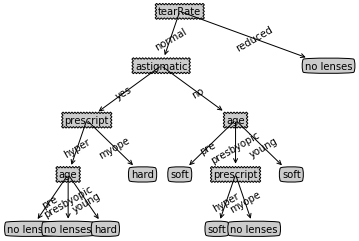

In [19]:
from treePlotter import *
createPlot(lensesTree)